# Modelo de Arbol de Decision

In [48]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Datos Preprocesados de train_data

In [49]:
# cargar datos que cosnideran los valores faltantes
df_prep = pd.read_csv('../Datos_Hackaton/train_data_knn.csv', sep=',')
df_prep

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
0,Híbrida,Mujer,Ferias & Networking,Soltero,100247.0,102074.0,1.0,2.0,1.0,1.0,140011.0,99.0,75.0,0.0,19.0
1,Híbrida,Hombre,Ferias & Networking,Soltero,103355.0,102115.0,1.0,1.0,2.0,2.0,182774.0,99.0,81.0,1.0,25.0
2,Híbrida,Mujer,Referidos,Viudo,100669.0,102060.0,1.0,5.0,3.0,11.0,682106.0,96.0,74.0,0.0,45.0
3,Híbrida,Hombre,Linkedin,Soltero,103760.0,102062.0,1.0,13.0,2.0,2.0,270232.0,96.0,82.0,1.0,22.0
4,Híbrida,Hombre,Linkedin,Soltero,100965.0,102062.0,1.0,13.0,2.0,2.0,266804.0,95.0,82.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Presencial,Mujer,Portal Web,Casado,103567.0,102171.0,1.0,2.0,8.0,3.0,281159.0,67.0,65.0,1.0,47.0
2148,Presencial,Mujer,Linkedin,Casado,104098.0,102172.0,1.0,1.0,12.0,13.0,460337.0,75.0,82.0,1.0,47.0
2149,Presencial,Hombre,Portal Web,Soltero,103987.0,102155.0,1.0,2.0,1.0,11.0,633879.0,68.0,66.0,1.0,51.0
2150,Presencial,Hombre,Portal Web,Casado,103810.0,102141.0,1.0,6.0,2.0,6.0,793977.0,61.0,80.0,1.0,52.0


## Missing

In [50]:
df_prep.isnull().sum()

modalidad_trabajo       0
genero                  0
canal_reclutamiento     0
estado_civil            0
id_colaborador          0
id_ultimo_jefe          0
seniority               0
distancia_oficina       0
dias_baja_salud         0
permanencia_promedio    0
salario                 0
performance_score       0
psi_score               0
abandono_6meses         0
edad_ingreso            0
dtype: int64

## Transformar variables Categoricas a numericas

In [51]:
# librerias
from sklearn.preprocessing import LabelEncoder
'''
# creamos una clase LabelEncoder
le = LabelEncoder()

# pasamos la variable a convertir a la clase antes definida
df_prep['genero'] = le.fit_transform(df_prep['genero'])

# pasamos la variable a convertir a la clase antes definida
df_prep['modalidad_trabajo'] = le.fit_transform(df_prep['modalidad_trabajo'])

df_prep['canal_reclutamiento'] = le.fit_transform(df_prep['canal_reclutamiento'])

df_prep['estado_civil'] = le.fit_transform(df_prep['estado_civil'])
'''
# Convertimos variables categoricas en numericas con get_dummies
df_prep = pd.get_dummies(df_prep)
df_prep.head(5)

,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,...,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo
0,100247.0,102074.0,1.0,2.0,1.0,1.0,140011.0,99.0,75.0,0.0,...,1,1,0,0,0,0,0,0,1,0
1,103355.0,102115.0,1.0,1.0,2.0,2.0,182774.0,99.0,81.0,1.0,...,0,1,0,0,0,0,0,0,1,0
2,100669.0,102060.0,1.0,5.0,3.0,11.0,682106.0,96.0,74.0,0.0,...,1,0,0,0,0,1,0,0,0,1
3,103760.0,102062.0,1.0,13.0,2.0,2.0,270232.0,96.0,82.0,1.0,...,0,0,0,1,0,0,0,0,1,0
4,100965.0,102062.0,1.0,13.0,2.0,2.0,266804.0,95.0,82.0,0.0,...,0,0,0,1,0,0,0,0,1,0


## Analisis de Correlacion

In [52]:
import matplotlib.pyplot as plt

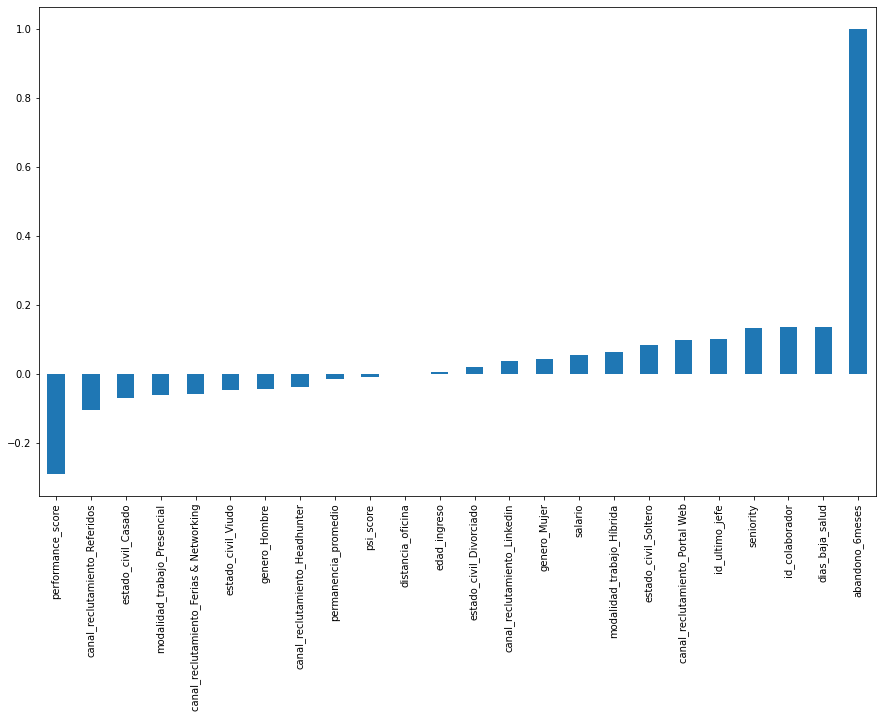

In [53]:
fig = plt.figure(figsize=(15,9))
df_prep.corr()['abandono_6meses'].sort_values(ascending=True).plot(kind='bar')
plt.show()

- La variable **performance_score** es la que mayor correlacion presenta con la variable objetivo
- La variable **dias_baja_salud** es la segunda con mayor correlacion con la variables objetivo
- A pesar que existe correlacion entre algunas variables, esta es baja.

## Seleccion de variables predictoras y objetivo

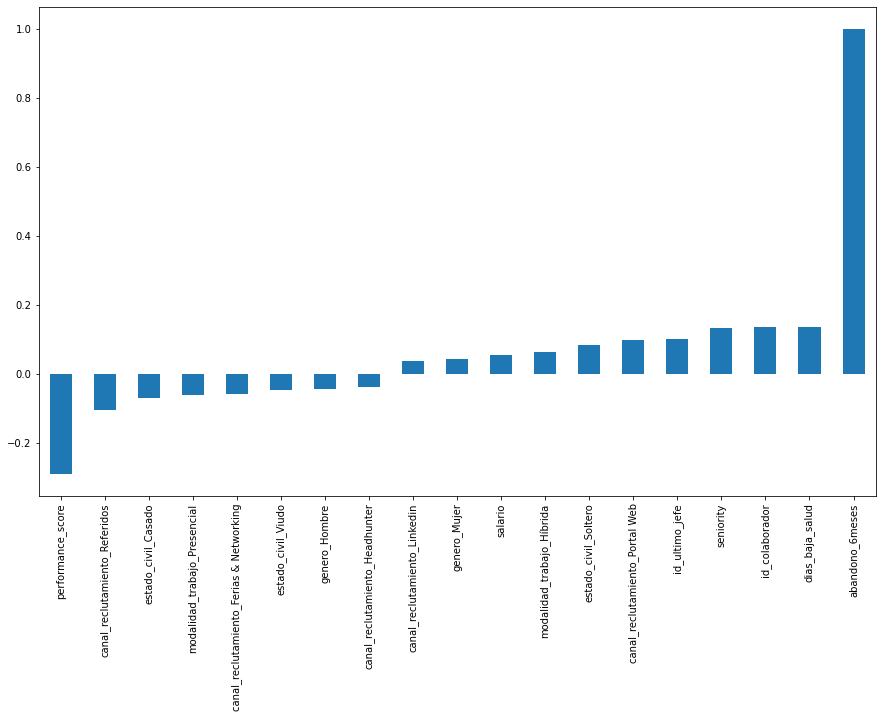

In [54]:
df_prep = df_prep.drop(['distancia_oficina','psi_score','edad_ingreso','distancia_oficina','permanencia_promedio','estado_civil_Divorciado'], axis=1)

# variables predictoras
X = df_prep.drop('abandono_6meses', axis=1)

# variables objetivo
y = df_prep['abandono_6meses'].values

fig = plt.figure(figsize=(15,9))
df_prep.corr()['abandono_6meses'].sort_values(ascending=True).plot(kind='bar')
plt.show()

In [55]:
X

,id_colaborador,id_ultimo_jefe,seniority,dias_baja_salud,salario,performance_score,modalidad_trabajo_Híbrida,modalidad_trabajo_Presencial,genero_Hombre,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Soltero,estado_civil_Viudo
0,100247.0,102074.0,1.0,1.0,140011.0,99.0,1,0,0,1,1,0,0,0,0,0,1,0
1,103355.0,102115.0,1.0,2.0,182774.0,99.0,1,0,1,0,1,0,0,0,0,0,1,0
2,100669.0,102060.0,1.0,3.0,682106.0,96.0,1,0,0,1,0,0,0,0,1,0,0,1
3,103760.0,102062.0,1.0,2.0,270232.0,96.0,1,0,1,0,0,0,1,0,0,0,1,0
4,100965.0,102062.0,1.0,2.0,266804.0,95.0,1,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,103567.0,102171.0,1.0,8.0,281159.0,67.0,0,1,0,1,0,0,0,1,0,1,0,0
2148,104098.0,102172.0,1.0,12.0,460337.0,75.0,0,1,0,1,0,0,1,0,0,1,0,0
2149,103987.0,102155.0,1.0,1.0,633879.0,68.0,0,1,1,0,0,0,0,1,0,0,1,0
2150,103810.0,102141.0,1.0,2.0,793977.0,61.0,0,1,1,0,0,0,0,1,0,1,0,0


## Escalar los datos

In [56]:
# libreria para escalar datos
from sklearn.preprocessing import MinMaxScaler

In [57]:
# creamos el objeto escalador
scaler = MinMaxScaler()

# pasamos al escalador las variables predictoras
Xs =  scaler.fit_transform(X)

In [58]:
# pasamos las variables predictoras a un dataframe
Xs = pd.DataFrame(Xs)

Xs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.058993,0.430233,0.0,0.028571,0.034818,1.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.804317,0.668605,0.0,0.057143,0.058269,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160192,0.348837,0.0,0.085714,0.332104,0.968085,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.901439,0.360465,0.0,0.057143,0.106232,0.968085,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.231175,0.360465,0.0,0.057143,0.104352,0.957447,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,0.855156,0.994186,0.0,0.228571,0.112224,0.659574,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2148,0.982494,1.000000,0.0,0.342857,0.210486,0.744681,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2149,0.955875,0.901163,0.0,0.028571,0.305656,0.670213,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2150,0.913429,0.819767,0.0,0.057143,0.393454,0.595745,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [59]:
# recuperamos los nombres de las variables predictoras
Xs.columns = X.columns
Xs

,id_colaborador,id_ultimo_jefe,seniority,dias_baja_salud,salario,performance_score,modalidad_trabajo_Híbrida,modalidad_trabajo_Presencial,genero_Hombre,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Soltero,estado_civil_Viudo
0,0.058993,0.430233,0.0,0.028571,0.034818,1.000000,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.804317,0.668605,0.0,0.057143,0.058269,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160192,0.348837,0.0,0.085714,0.332104,0.968085,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.901439,0.360465,0.0,0.057143,0.106232,0.968085,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.231175,0.360465,0.0,0.057143,0.104352,0.957447,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,0.855156,0.994186,0.0,0.228571,0.112224,0.659574,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2148,0.982494,1.000000,0.0,0.342857,0.210486,0.744681,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2149,0.955875,0.901163,0.0,0.028571,0.305656,0.670213,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2150,0.913429,0.819767,0.0,0.057143,0.393454,0.595745,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Datos Preprocesados de test_data

In [60]:
df_test = pd.read_csv('../Datos_Hackaton/test_data_knn.csv', sep=',')
df_test.head()

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso
0,Híbrida,Hombre,Ferias & Networking,Soltero,100486.0,102115.0,1.0,1.0,2.0,2.0,181654.0,99.0,81.0,24.0
1,Híbrida,Mujer,Ferias & Networking,Soltero,103752.0,102074.0,1.0,2.0,1.0,1.0,140986.0,97.0,75.0,19.0
2,Híbrida,Hombre,Portal Web,Soltero,103937.0,102150.0,1.0,2.0,1.0,6.0,406690.0,96.0,69.0,38.0
3,Híbrida,Hombre,Linkedin,Casado,101744.0,102172.0,1.0,2.0,3.0,3.0,249107.0,95.0,73.0,31.0
4,Híbrida,Hombre,Referidos,Viudo,101037.0,102060.0,1.0,5.0,3.0,10.0,698318.0,95.0,81.0,46.0


## Convertir variables categoricas a numericas

In [61]:
# librerias
'''
from sklearn.preprocessing import LabelEncoder

# creamos una clase LabelEncoder
le = LabelEncoder()

# pasamos la variable a convertir a la clase antes definida
df_test['genero'] = le.fit_transform(df_test['genero'])

# pasamos la variable a convertir a la clase antes definida
df_test['modalidad_trabajo'] = le.fit_transform(df_test['modalidad_trabajo'])

df_test['canal_reclutamiento'] = le.fit_transform(df_test['canal_reclutamiento'])

df_test['estado_civil'] = le.fit_transform(df_test['estado_civil'])
'''
# Convertimos variables categoricas en numericas con get_dummies
df_test = pd.get_dummies(df_test)
df_test.head(5)

,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,edad_ingreso,...,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo
0,100486.0,102115.0,1.0,1.0,2.0,2.0,181654.0,99.0,81.0,24.0,...,0,1,0,0,0,0,0,0,1,0
1,103752.0,102074.0,1.0,2.0,1.0,1.0,140986.0,97.0,75.0,19.0,...,1,1,0,0,0,0,0,0,1,0
2,103937.0,102150.0,1.0,2.0,1.0,6.0,406690.0,96.0,69.0,38.0,...,0,0,0,0,1,0,0,0,1,0
3,101744.0,102172.0,1.0,2.0,3.0,3.0,249107.0,95.0,73.0,31.0,...,0,0,0,1,0,0,1,0,0,0
4,101037.0,102060.0,1.0,5.0,3.0,10.0,698318.0,95.0,81.0,46.0,...,0,0,0,0,0,1,0,0,0,1


## Seleccion variables

In [62]:
# variables predictoras
df_X = df_test.drop(['psi_score','edad_ingreso','distancia_oficina','permanencia_promedio','estado_civil_Divorciado'], axis=1)
df_n= df_X.copy(deep=True)


## Escalar datos de Test

In [63]:
#df_X = df_test.copy(deep=True)

# creamos el objeto escalador
scaler = MinMaxScaler()

# pasamos al escalador las variables predictoras
Xt =  scaler.fit_transform(df_X)

In [64]:
# pasamos las variables predictoras a un dataframe
Xt = pd.DataFrame(Xt)

# recuperamos los nombres de las variables predictoras
Xt.columns = df_n.columns
Xt

,id_colaborador,id_ultimo_jefe,seniority,dias_baja_salud,salario,performance_score,modalidad_trabajo_Híbrida,modalidad_trabajo_Presencial,genero_Hombre,genero_Mujer,canal_reclutamiento_Ferias & Networking,canal_reclutamiento_Headhunter,canal_reclutamiento_Linkedin,canal_reclutamiento_Portal Web,canal_reclutamiento_Referidos,estado_civil_Casado,estado_civil_Soltero,estado_civil_Viudo
0,0.116491,0.668605,0.0,0.086957,0.058174,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.899329,0.430233,0.0,0.043478,0.035884,0.894737,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.943672,0.872093,0.0,0.043478,0.181516,0.842105,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.418025,1.000000,0.0,0.130435,0.095145,0.789474,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.248562,0.348837,0.0,0.130435,0.341358,0.789474,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.900048,0.936047,0.0,0.086957,0.342726,0.526316,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2016,0.953020,0.994186,0.0,0.000000,0.329712,0.684211,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2017,0.986337,0.837209,0.0,0.043478,0.438901,0.210526,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2018,0.939597,0.883721,0.0,0.043478,0.352749,0.578947,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Entrenamiento del Modelo

In [65]:
# dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs,y, test_size=0.3, random_state=42)

Vamos a conseguir el mejor modelo

In [66]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(n_estimators=5, random_state=00000)

#Entrenamiento
random_forest.fit(X_train,y_train)

random_forest

RandomForestClassifier(n_estimators=5, random_state=0)

In [67]:
# llamamos las metricas del modelo
from sklearn import metrics

#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es: ', train_accuracy)
print('El accuracy en test es: ', test_accuracy)

El accuracy en train es:  0.949535192563081
El accuracy en test es:  0.6253869969040248


# Evaluacion del Modelo

In [68]:
#Verificamos el feature importances
import seaborn as sns

# almacena la importancia de cada features en una variable
importances = random_forest.feature_importances_

# guardar el nombre de las variables features
columns = Xs.columns

#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending = False)

# Mostrar
feature_importances_df



,feature,importance
0,id_colaborador,0.203530
5,performance_score,0.196932
4,salario,0.167947
1,id_ultimo_jefe,0.164253
3,dias_baja_salud,0.091068
13,canal_reclutamiento_Portal Web,0.019106
16,estado_civil_Soltero,0.018886
15,estado_civil_Casado,0.018712
8,genero_Hombre,0.017753
2,seniority,0.015337


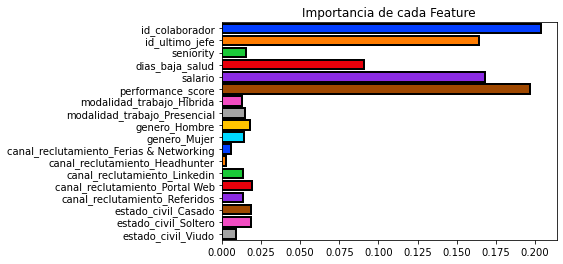

In [69]:
# Grafico
sns.barplot(y=columns, x=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature');

In [70]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_test_pred)

In [71]:
matriz_confusion

array([[217, 120],
       [122, 187]])

<Figure size 792x792 with 0 Axes>

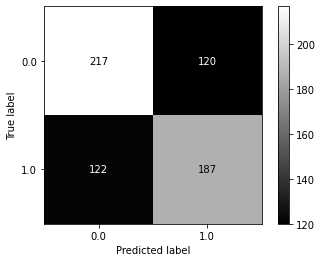

In [72]:
# llamamos el metodo para crear la matriz de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Size de la grafica
fig = plt.figure(figsize=(11,11))

# creacion de la matriz
cm = confusion_matrix(y_test, y_test_pred, labels=random_forest.classes_)

# visualizacion de la matriz
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=random_forest.classes_)
disp.plot(cmap='gray')
plt.show()

In [73]:
# Calcular métricas a partir de la matriz de confusión
TP = cm[1, 1]  # Verdaderos positivos
TN = cm[0, 0]  # Verdaderos negativos
FP = cm[0, 1]  # Falsos positivos
FN = cm[1, 0]  # Falsos negativos

In [74]:
# Calcular precisión, sensibilidad, especificidad, y tasa de error
precision = TP / (TP + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
tasa_error = (FP + FN) / (TP + TN + FP + FN)

# Imprimir las métricas
print("Precisión:", precision)
print("Sensibilidad:", sensibilidad)
print("Especificidad:", especificidad)
print("Tasa de Error:", tasa_error)
print('f1-score: ',(2*precision*sensibilidad)/(precision + sensibilidad))

Precisión: 0.6091205211726385
Sensibilidad: 0.6051779935275081
Especificidad: 0.6439169139465876
Tasa de Error: 0.3746130030959752
f1-score:  0.6071428571428572


# Prediccion del modelo para test_data

In [75]:
# creamos la nueva prediccion
prediction_test = tree.predict(Xt)

NameError: name 'tree' is not defined

In [ ]:
# convertimos las predicciones a un dataframe
df_pred = pd.DataFrame(prediction_test, columns=['abandono_6meses'])
df_pred.head()

,abandono_6meses
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


In [ ]:
# trae los valores originales de id_colaborador al nuevo dataframe
df_pred['ID'] = df_test['id_colaborador'].values

# reordenar variables
df_pred = df_pred[['ID','abandono_6meses']]

#Convertir valores a formato correcto
df_pred['abandono_6meses'] = df_pred['abandono_6meses'].astype(int)

df_pred

,ID,abandono_6meses
0,100486.0,0
1,103752.0,1
2,103937.0,1
3,101744.0,0
4,101037.0,0
...,...,...
2015,103755.0,1
2016,103976.0,1
2017,104115.0,1
2018,103920.0,1


In [ ]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2020 non-null   float64
 1   abandono_6meses  2020 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.7 KB


# Exportar Predicciones

In [ ]:
# exportar predicciones
#df_pred.to_csv('submission_6.csv', index=False)